In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as pltc
import geopandas
import dataretrieval.nwis as nwis
import contextily as cx

/opt/miniconda3/lib/python3.9/site-packages/dataretrieval/nadp.py:44: UserWarning: GDAL not installed. Some functions will not work.
  warnings.warn('GDAL not installed. Some functions will not work.')


In [2]:
dat = pd.read_csv("../data/dryingRegimes_data_RF.csv")
gages = dat.gage.astype("string").str.zfill(width=8)

In [3]:
siteINFO_huc = nwis.get_info(huc='17', siteType='ST')
huc17 = pd.DataFrame(siteINFO_huc[0].site_no).astype(int)
huc17.columns = ['gage']

NP_HUC17 = pd.merge(dat,huc17,on='gage')

In [4]:
NP_summary = NP_HUC17.groupby("gage").size().reset_index(name='counts')

NP_gage = pd.DataFrame(NP_HUC17.gage.unique())
NP_gage = NP_gage[0].astype("string").str.zfill(width=8)

In [6]:
NP_summary.to_csv('../data/PNW_DryingRegimeGages.csv')

In [207]:
siteINFO_multi = nwis.get_info(sites=NP_gage)
sites = pd.DataFrame(siteINFO_multi[0])[['site_no','station_nm','dec_lat_va','dec_long_va']]
sites.columns = ['gage','station_nm','dec_lat_va','dec_long_va']
sites.gage = sites.gage.astype(int)

In [208]:
NP_summary = pd.merge(NP_summary,sites,on='gage')
NP_summary = geopandas.GeoDataFrame(NP_summary, geometry=geopandas.points_from_xy(NP_summary.dec_long_va,NP_summary.dec_lat_va)).set_crs('epsg:4269')

NP_summary = NP_summary.to_crs(epsg=3857)

In [304]:
pnw_hydro = geopandas.read_file("../data/mapping/pnw_hydrologic_landscape_class/PNW Hydrologic Landscape Class.shp")

pnw_hydro_repro = pnw_hydro.to_crs(epsg=3857)
pnw_hydro_repro.CLASS = pnw_hydro['CLASS'].astype(str).str[0:1]

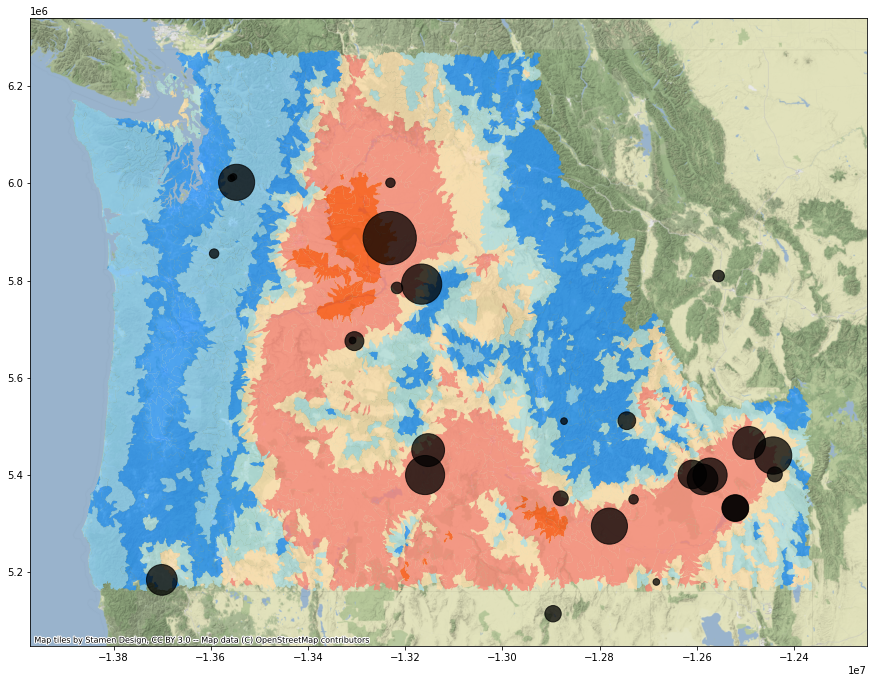

In [342]:
color_map = {'W': 'dodgerblue',
          'V': 'lightskyblue' ,
          'D': 'navajowhite',
          'M': 'powderblue',
          'S': 'salmon' ,
          'A': 'orangered' ,
          'B': 'hotpink' }

f,ax = plt.subplots(figsize=(15, 15))

pnw_hydro_repro.plot(ax=ax,legend=True,color = pnw_hydro_repro['CLASS'].map(color_map),alpha=.75)
tt.plot(ax=ax,markersize=tt['counts']*45, color = 'black', alpha = .75)

cx.add_basemap(ax, reset_extent= False,zoom=10)

# f.savefig('../docs/Gages2_PNW.png',dpi=600)